In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import math

In [2]:
data=pd.read_csv('train_logistic.csv')

In [3]:
data=data.drop(['Name'],axis=1)

In [4]:
x_train=np.array(data.iloc[:,1:7])
y_train=np.array(data.iloc[:,:1])

In [5]:
x_train[x_train=='male']=1
x_train[x_train=='female']=0

In [6]:
#x_train=(x_train-x_train.mean())/x_train.std()
x_train=x_train/np.max(x_train)

In [7]:
x_train

array([[0.005855610025741261, 0.0019518700085804205, 0.04294114018876925,
        0.0019518700085804205, 0.0, 0.014151057562208049],
       [0.0019518700085804205, 0.0, 0.07417106032605598,
        0.0019518700085804205, 0.0, 0.13913573538264068],
       [0.005855610025741261, 0.0, 0.050748620223090936, 0.0, 0.0,
        0.015468569817999833],
       ...,
       [0.0019518700085804205, 0.0, 0.0761229303346364,
        0.0019518700085804205, 0.0, 0.1091095334796455],
       [0.005855610025741261, 0.0, 0.03513366015444757,
        0.0019518700085804205, 0.0, 0.028220722145058292],
       [0.005855610025741261, 0.0019518700085804205, 0.06245984027457346,
        0.0, 0.0, 0.015468569817999833]], dtype=object)

In [8]:
w=np.zeros(6)
#w=np.array([-0.00258793,-0.00513033,0.00385756,-0.0075946,-0.00859321,-0.16591591])
b=0
alpha=10**-4

In [9]:
def sigmoid(w,x,b):
    #x = np.array(x, dtype=np.float128)
    #w = np.array(w, dtype=np.float128)
    #b = np.array(b, dtype=np.float128)
    return 1/(1+(np.exp(((np.dot(x,w))+b))))

In [10]:
def exp(w,x,b):
    e=math.e
    return e**((np.dot(w,x))+b)

In [11]:
# def log(a):
#     return np.log(a+0.00001)

In [12]:
def CostFunc(w,x,b,y):
    c=0
    #print(x)
    for i in range(len(x)):
        #print(x[i])
        #print(sigmoid(w,x[i],b))
        c=c+((-1)*(1-y[i])*np.log(sigmoid(w,x[i],b)+0.000001))+((-1)*(y[i])*np.log(1-sigmoid(w,x[i],b)+0.000001))
    c=(-1)*c/len(x)
    return c

In [13]:
def GradientDecent(w,x,b,y):
    dj_db=0
    dj_dw=np.zeros(len(x[0]))
    for i in range(len(x)):
        er=sigmoid(w,x[i],b)*(((1-y[i])*exp(w,x[i],b))-y[i])
        for j in range(len(x[0])):
            dj_dw[j] = dj_dw[j] + er * x[i, j]
        dj_db=dj_db+er
    w=w-dj_dw*(alpha)
    b=b-dj_db*(alpha)
    return w,b

In [14]:
epochs=100
iterations=[]
costs = []
for i in range(epochs):
    w,b=GradientDecent(w,x_train,b,y_train)
    costs.append(CostFunc(w,x_train,b,y_train))
    iterations.append(i)

In [15]:
costs

[array([-0.69253305]),
 array([-0.69193844]),
 array([-0.69136086]),
 array([-0.69079982]),
 array([-0.69025482]),
 array([-0.68972542]),
 array([-0.68921116]),
 array([-0.6887116]),
 array([-0.68822631]),
 array([-0.68775489]),
 array([-0.68729692]),
 array([-0.68685203]),
 array([-0.68641984]),
 array([-0.68599996]),
 array([-0.68559206]),
 array([-0.68519577]),
 array([-0.68481077]),
 array([-0.68443673]),
 array([-0.68407332]),
 array([-0.68372025]),
 array([-0.68337721]),
 array([-0.6830439]),
 array([-0.68272006]),
 array([-0.6824054]),
 array([-0.68209965]),
 array([-0.68180256]),
 array([-0.68151389]),
 array([-0.68123337]),
 array([-0.68096079]),
 array([-0.6806959]),
 array([-0.68043848]),
 array([-0.68018833]),
 array([-0.67994522]),
 array([-0.67970896]),
 array([-0.67947934]),
 array([-0.67925617]),
 array([-0.67903928]),
 array([-0.67882847]),
 array([-0.67862356]),
 array([-0.6784244]),
 array([-0.67823081]),
 array([-0.67804263]),
 array([-0.6778597]),
 array([-0.677681

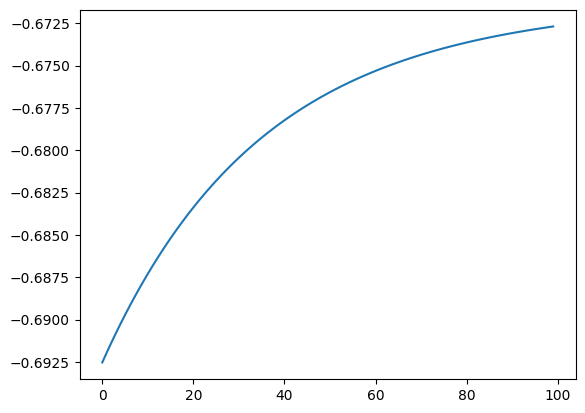

In [16]:
plt.plot(iterations,costs)
plt.show()

In [17]:
t = np.array(sigmoid(w, x_train, b) , dtype=np.float128)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [18]:
t = np.dot(x_train, w)+b

In [19]:
t

array([-0.31767387972458017, -0.31458853205830434, -0.317811538176559,
       -0.31553112643349407, -0.3182187631851327, -0.3178291854125514,
       -0.3164746278741466, -0.31594206250437273, -0.3176662688025503,
       -0.31594469665442254, -0.31628693124362023, -0.31815652856025045,
       -0.3175337585295613, -0.31702265867449114, -0.31726773805363107,
       -0.3186511780373069, -0.3154653995541625, -0.31737159730905357,
       -0.3174429799830551, -0.3176704313004752, -0.317147753295094,
       -0.3178739340564726, -0.317303014772652, -0.31625877559575943,
       -0.316212420538501, -0.31696666841777027, -0.31785674303672784,
       -0.3023438538693642, -0.31772292350143816, -0.3176799147623113,
       -0.3172686530068851, -0.3105781330425987, -0.31745659261827136,
       -0.31948370957907946, -0.3134890836350997, -0.31591974929411165,
       -0.31749115785423065, -0.3175794255065994, -0.3168505982001384,
       -0.3170679012634491, -0.3183601367740904, -0.31707692708404317,
     

In [20]:
t=math.e ** t

In [21]:
w

array([-0.00269807, -0.00186684, -0.02339653, -0.00066035,  0.00011534,
        0.03041847])

In [22]:
t

array([0.7278401131324472, 0.7300892207822679, 0.7277399266850992,
       0.7294013670238427, 0.7274436331203847, 0.7277270842001894,
       0.7287135003358752, 0.7291016912699899, 0.727845652687879,
       0.7290997707092631, 0.728850290241608, 0.7274889067107928,
       0.7279421061044038, 0.7283142523031662, 0.7281357793693042,
       0.7271291436891547, 0.7294493098750271, 0.7280601596563839,
       0.7280081906302198, 0.7278426230381656, 0.7282231498064297,
       0.7276945201286312, 0.7281100935810642, 0.7288708117826206,
       0.7289045994139425, 0.7283550319467468, 0.7277070300470236,
       0.7390838843381389, 0.7278044179796702, 0.7278357206031568,
       0.7281351131594083, 0.7330230488531388, 0.7279982805877373,
       0.7265240376619687, 0.7308923576477341, 0.7291179600508326,
       0.7279731175902758, 0.7279088639479994, 0.728439577180315,
       0.728281302226196, 0.7273407990723866, 0.728274728919485,
       0.7299650501270261, 0.7279706200920388, 0.727609752843578,
 

In [49]:
a = np.array(t >=0.73, dtype=np.intp)

In [50]:
a

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [51]:
sum(a == y_train.T[0])/y_train.shape[0]

0.6412478336221837

In [52]:
test=pd.read_csv('test_Logistic.csv')
test=test.drop(['Name'],axis=1)
x_test=np.array(test.iloc[:,1:7])
y_test=np.array(test.iloc[:,:1])
x_test[x_test=='male']=1
x_test[x_test=='female']=0
x_test=((x_test-x_test.mean()))/x_test.std()

In [53]:
x_test

array([[-0.33409588539222074, -0.4075653718674399, 0.5108032090728001,
        -0.37083062862983035, -0.37083062862983035, 0.694476925260848],
       [-0.37083062862983035, -0.4075653718674399, 1.0250896143993344,
        -0.37083062862983035, -0.37083062862983035, 3.6657041829713966],
       [-0.33409588539222074, -0.37083062862983035, 1.5761107629634785,
        -0.4075653718674399, -0.4075653718674399, 0.5475379523104096],
       ...,
       [-0.2973611421546111, -0.4075653718674399, -0.15042216920417273,
        -0.37083062862983035, -0.33409588539222074, 0.4538643570545051],
       [-0.37083062862983035, -0.37083062862983035, 0.5475379523104096,
        -0.4075653718674399, -0.4075653718674399, 0.694476925260848],
       [-0.2973611421546111, -0.37083062862983035, 0.7679464117360673,
        -0.4075653718674399, -0.4075653718674399, -0.12287111177596553]],
      dtype=object)

In [54]:
ta = np.dot(x_test, w)+b

In [55]:
len(ta)

310

In [56]:
ta

array([-0.30604064281776927, -0.22759385229872808, -0.3354833546476567,
       -0.30413038170765977, -0.32224009111829316, -0.24441713491494643,
       -0.34175865936223304, -0.2811145897784529, -0.32813717060297914,
       -0.32813717060297914, -0.34034382903915034, -0.275217409221463,
       -0.3505177366153334, -0.3438657196465331, -0.32089670119601743,
       -0.32219932896147463, -0.30782517002671056, -0.36033792431801487,
       -0.3256211763014914, -0.29655042829920075, -0.308557679521798,
       -0.3454987833254066, -0.30244772851085283, -0.3470454087070889,
       -0.31843982162380047, -0.33181333291634224, -0.3351851989049831,
       -0.30715031039885426, -0.2905192407229074, -0.1808546706373437,
       -0.31673061878936465, -0.3283951199885338, -0.3163302491523987,
       -0.32847239502915615, -0.3393102203917712, -0.26606742399095695,
       -0.3313751920754899, -0.3225355232469937, -0.2779593951073455,
       -0.32873825301914694, -0.32530260768837377, -0.29542286026903497

In [57]:
ta=math.e**ta

In [58]:
ta

array([0.7363566912371056, 0.7964476695451221, 0.7149924079132458,
       0.7377646691621277, 0.7245242176164489, 0.7831608823697322,
       0.7105196612868261, 0.7549418219073999, 0.7202642138523087,
       0.7202642138523087, 0.7115256375237944, 0.7594070031909725,
       0.7043233413222244, 0.7090241296682626, 0.7254981902148492,
       0.7245537513881523, 0.7350438144666751, 0.6974406041046839,
       0.722078676141153, 0.7433781390236642, 0.7345055850464198,
       0.7078671930473629, 0.7390071162518209, 0.7067732338703175,
       0.7272828433392521, 0.7176212666216192, 0.7152056187890772,
       0.7355400332819537, 0.7478751395153717, 0.8345566354669711,
       0.7285269801747445, 0.720078446101277, 0.7288187186550346,
       0.7200228041599976, 0.7122614567846371, 0.7663874528582924,
       0.7179357546967943, 0.7243102014997185, 0.7573275720947885,
       0.7198314057880567, 0.7223087443878885, 0.744216821194294,
       0.7277167097019035, 0.7207258173838037, 0.7273972576807798

In [59]:
y_predict = np.array(ta >=0.73, dtype=np.intp)

In [60]:
y_predict

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [61]:
len(y_predict)

310

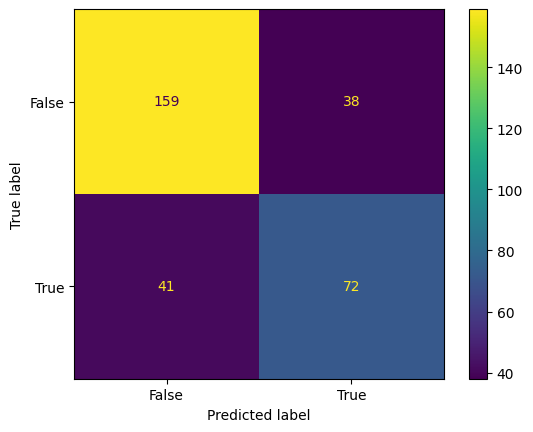

In [62]:
confusion_matrix = metrics.confusion_matrix(y_test,y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
Accuracy=metrics.accuracy_score(y_test,y_predict)

In [65]:
Accuracy

0.7451612903225806

In [67]:
ta.mean()

0.7373088933543677

In [69]:
th = ta.mean()
d = 0.002
last = Accuracy
while True:
    acc = metrics.accuracy_score(y_test, np.array(ta >= th, dtype=np.intp))
    racc = metrics.accuracy_score(y_test, np.array(ta >= (th+d), dtype=np.intp))
    lacc = metrics.accuracy_score(y_test, np.array(ta >= (th-d), dtype=np.intp))
    if racc > lacc:
        if last > racc:
            d = d/2
        th = th+d
    else:
        if last > lacc:
            d = d/2
        th = th-d
    last = acc
    print(acc)

0.7193548387096774
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451

0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451

0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580645161
0.7225806451612903
0.7290322580

KeyboardInterrupt: 